In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

minute_aggregated/all_background-0.1s.featureset.csv
Accuracy: 0.8584, Recall: 0.7906, Precision: 0.9748, f1_score: 0.8731 



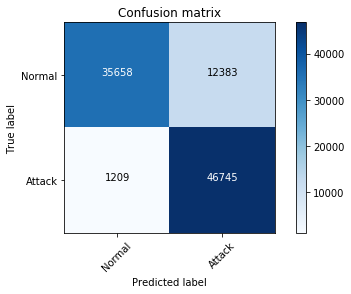

minute_aggregated/spam_background-0.1s.featureset.csv
Accuracy: 0.8992, Recall: 0.8440, Precision: 0.9803, f1_score: 0.9071 



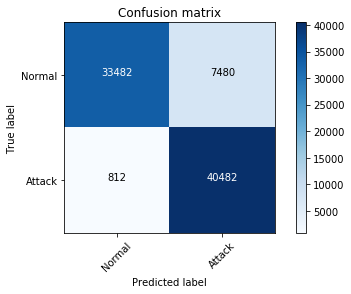

minute_aggregated/ddos_background-0.1s.featureset.csv
Accuracy: 0.8884, Recall: 0.8551, Precision: 0.9371, f1_score: 0.8943 



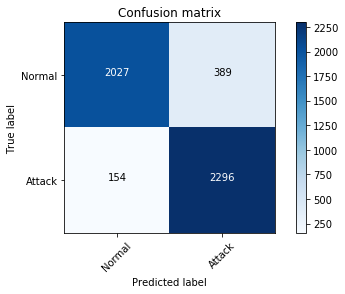

minute_aggregated/irc_background-0.1s.featureset.csv
Accuracy: 0.8607, Recall: 0.7934, Precision: 0.9768, f1_score: 0.8756 



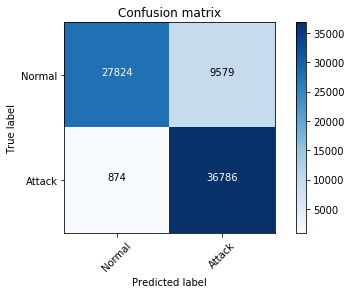

In [3]:
# Probability manipulation
from botnet_detection import summary_of_detection, rf_train, test_dict, get_specific_features_from, dl_train, dl_test_dict, test_proba
from summarizer import Summarizer
from plot_features import plot_confusion_matrix
attacks = ['spam', 'ddos', 'irc']
files = ['minute_aggregated/all_background-0.1s.featureset.csv']
files += ['minute_aggregated/{}_background-0.1s.featureset.csv'.format(attack) for attack in attacks]
for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=True)
    clf = rf_train(xtrain, ytrain)
    results = test_proba(clf, xtest, ytest, normal_thresh=.7)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

In [12]:
print('for deep learning')
from botnet_detection import dl_test_proba
for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=True)
    clf = dl_train(xtrain, ytrain)
    results = dl_test_proba(clf, xtest, ytest, .505)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

for deep learning
minute_aggregated/all_background-0.1s.featureset.csv


KeyboardInterrupt: 

minute_aggregated/all_background-0.1s.featureset.csv
2715597 2715597
2555606 159991
319982
class weights
Accuracy: 0.8730, Recall: 0.8582, Precision: 0.8933, f1_score: 0.8754 



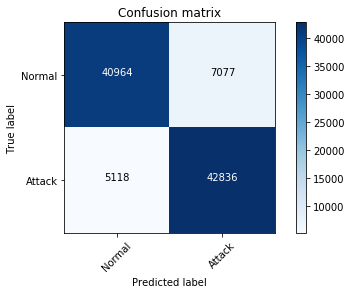

minute_aggregated/spam_background-0.1s.featureset.csv
2179232 2179232
2042139 137093
274186
class weights
Accuracy: 0.9102, Recall: 0.8941, Precision: 0.9315, f1_score: 0.9124 



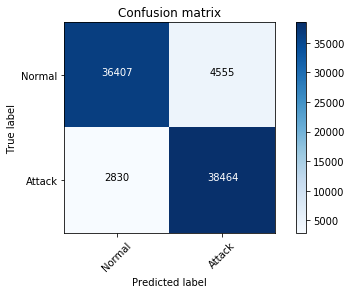

minute_aggregated/ddos_background-0.1s.featureset.csv
316203 316203
308093 8110
16220
class weights
Accuracy: 0.9028, Recall: 0.9459, Precision: 0.8559, f1_score: 0.8987 



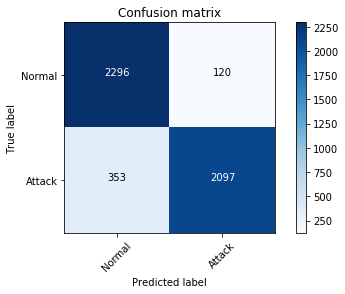

minute_aggregated/irc_background-0.1s.featureset.csv
2209125 2209125
2084020 125105
250210
class weights
Accuracy: 0.8785, Recall: 0.8631, Precision: 0.9008, f1_score: 0.8815 



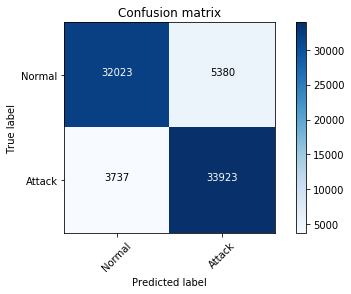

In [4]:
# Background detection
# Detecting Attacks
from botnet_detection import summary_of_detection, rf_train, test_dict, get_specific_features_from, dl_train, dl_test_dict
from summarizer import Summarizer
from plot_features import plot_confusion_matrix
attacks = ['spam', 'ddos', 'irc']
files = ['minute_aggregated/all_background-0.1s.featureset.csv']
files += ['minute_aggregated/{}_background-0.1s.featureset.csv'.format(attack) for attack in attacks]
for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=True)
    clf = rf_train(xtrain, ytrain)
    results = test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

minute_aggregated/all_background-0.1s.featureset.csv
2715597 2715597
2555606 159991
319982
Accuracy: 0.8766, Recall: 0.8498, Precision: 0.9146, f1_score: 0.8810 



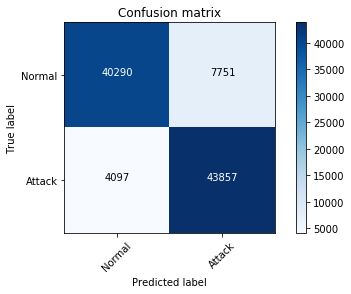

minute_aggregated/spam_background-0.1s.featureset.csv
2179232 2179232
2042139 137093
274186
Accuracy: 0.9092, Recall: 0.8854, Precision: 0.9408, f1_score: 0.9123 



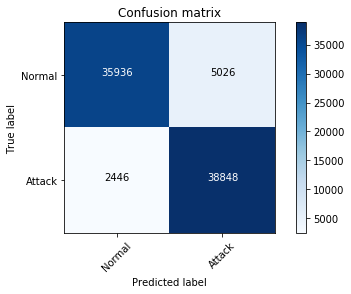

minute_aggregated/ddos_background-0.1s.featureset.csv
316203 316203
308093 8110
16220
Accuracy: 0.9110, Recall: 0.9414, Precision: 0.8780, f1_score: 0.9086 



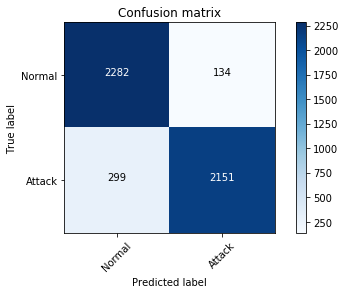

minute_aggregated/irc_background-0.1s.featureset.csv
2209125 2209125
2084020 125105
250210
Accuracy: 0.8790, Recall: 0.8509, Precision: 0.9199, f1_score: 0.8841 



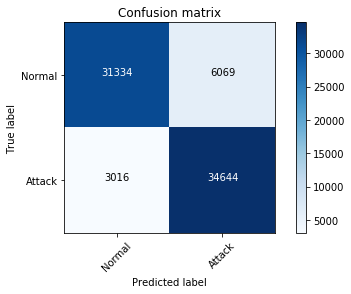

In [5]:
# No Class weight
for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=True)
    clf = rf_train(xtrain, ytrain)
    results = test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

Using TensorFlow backend.


Normal: 0.9992365226228617, 0.9614546918703452, 0.96620716063565, 0.9882134392415604
ddos: 0.9676023016506715, 0.8881928977062213, 0.8789120715350223, 0.922514619883041
spam: 0.9850288846385609, 0.9590965112666592, 0.8931903018847186, 0.9541666666666666
irc: 0.9813337084062225, 0.9559410111345709, 0.8678155917639698, 0.9451790332568389


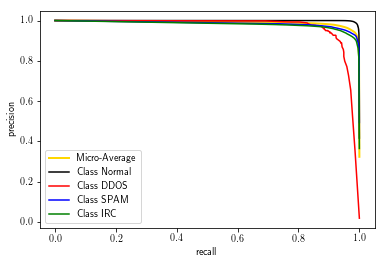

In [1]:
# Detecting Attacks
from botnet_detection import summary_of_detection, rf_train, test_dict, test, get_specific_features_from
from plot_features import plot_confusion_matrix
from summarizer import Summarizer

f = 'minute_aggregated/all-1.0s.featureset.csv'
xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, use_attack=True)

clf = rf_train(xtrain, ytrain, use_attack=True)
# results = test_dict(clf, xtest, ytest)
results = test(clf, xtest, ytest, use_attack=True)

# print(plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'DDOS', 'SPAM', 'IRC']))

for deep learning
minute_aggregated/all_background-0.1s.featureset.csv
2715597 2715597
2555606 159991
319982
Instructions for updating:
keep_dims is deprecated, use keepdims instead


W0312 12:28:26.629406 139764053935872 tf_logging.py:118] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:1290: calling reduce_mean (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


Accuracy: 0.5765, Recall: 0.9103, Precision: 0.1689, f1_score: 0.2849 



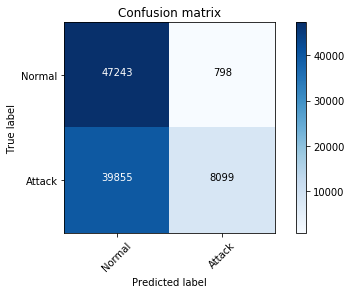

minute_aggregated/spam_background-0.1s.featureset.csv
2179232 2179232
2042139 137093
274186
Accuracy: 0.6287, Recall: 0.8681, Precision: 0.3071, f1_score: 0.4537 



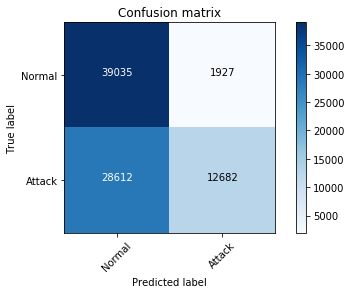

minute_aggregated/ddos_background-0.1s.featureset.csv
316203 316203
308093 8110
16220
Accuracy: 0.7082, Recall: 0.9342, Precision: 0.4522, f1_score: 0.6095 



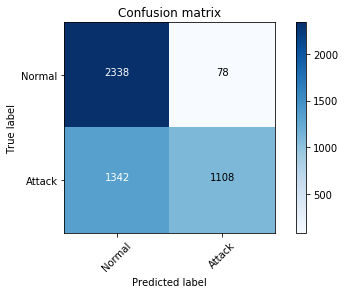

minute_aggregated/irc_background-0.1s.featureset.csv
2209125 2209125
2084020 125105
250210
Accuracy: 0.5820, Recall: 0.5457, Precision: 0.9969, f1_score: 0.7053 



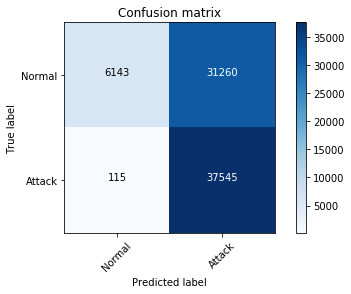

In [6]:
print('for deep learning')
for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features, has_bots_and_attack=f == 'minute_aggregated/all_background-1.0s.featureset.csv', sample=True)
    clf = dl_train(xtrain, ytrain)
    results = dl_test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook.py:2641: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


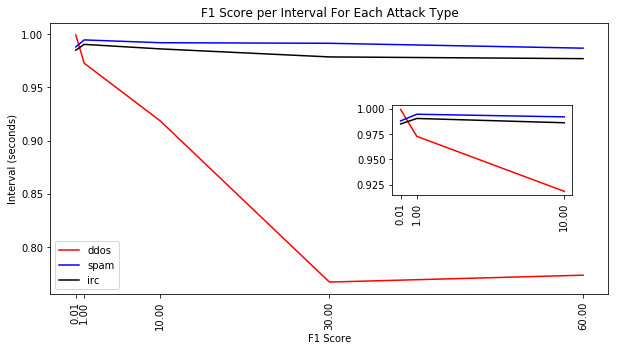

In [9]:
# Plotting the f1_score for each interval for DDOS attacks

from botnet_detection import get_plots_for_each_interval
from plot_features import plot_f1_per_interval
import matplotlib.pyplot as plt

# Get files containing each aggregated files.
intervals = [0.01, 1.0, 10.0, 30.0, 60.0]
attacks = ['ddos', 'spam', 'irc']
colors = ['red', 'blue', 'black']
plt.figure(figsize=(10, 5))
X_detail = []
Y_detail = []
for i, attack in enumerate(attacks):
    
    files = ['minute_aggregated/{}-{}s.featureset.csv'.format(attack, interval) for interval in intervals]
    
    # Run each file through machine learning and get f1_scores of each
    f1_scores = get_plots_for_each_interval(attack, intervals)
    plt.plot(intervals, f1_scores, color=colors[i], label=attack)
    Y_detail.append(f1_scores[:3])
    X_detail.append(intervals[:3])

    
plt.xticks(intervals, rotation=90)
plt.ylabel('Interval (seconds)')
plt.legend()
plt.xlabel('F1 Score')
plt.title('F1 Score per Interval For Each Attack Type')
# position of zoomed in plot
sub_axes = plt.axes([.6, .4, .25, .25])
i = 0
for xdetail, ydetail in zip(X_detail, Y_detail):
    sub_axes.plot(xdetail, ydetail, color = colors[i], c = 'k')
    i += 1
plt.xticks(intervals[:3], rotation=90)
plt.show()
# Now plot these scores
# plot_f1_per_interval(f1_scores, 'f1 score per interval for DDOS', intervals)

# Comparing amount of Random Forest Estimators

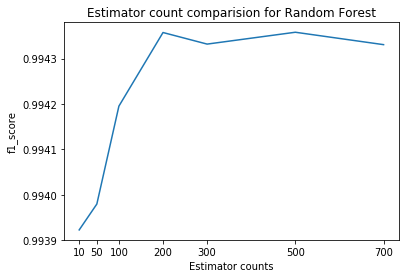

In [2]:
# For testing optimal amount of Random Forest estimators.
from botnet_detection import rf_compare_estimator_counts, get_specific_features_from
from plot_features import plot_rf_estimators
from summarizer import Summarizer
features = Summarizer().features
plot_rf_estimators(rf_compare_estimator_counts(*get_specific_features_from('minute_aggregated/spam-1s.featureset.csv', features)), 'Estimator count comparision for Random Forest')

**200** Seems the most optimal based on multiple runs

In [12]:
# Preparing things for the rest of the code here.

from botnet_detection import summary_of_detection, dl_test_dict, test_dict, dl_train, rf_train, dt_train, get_roc_metrics, get_specific_features_from
from utils import best_features
from plot_features import plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from summarizer import Summarizer
features = Summarizer().features
print(features)
attack_types = ['spam', 'irc']
files = ['minute_aggregated/{}-1s.featureset.csv'.format(attack) for attack in attack_types]
files += ['minute_aggregated/ddos-0.01s.featureset.csv']
# files += ['minute_aggregated/p2p-120.0s.featureset.csv']

['n_conn', 'avg_duration', 'n_udp', 'n_tcp', 'n_icmp', 'n_sports>1024', 'n_sports<1024', 'n_dports>1024', 'n_dports<1024', 'n_d_a_p_address', 'n_d_b_p_address', 'n_d_c_p_address', 'n_d_na_p_address', 'std_packets', 'std_bytes', 'std_time', 'std_srcbytes', 'src_to_dst', 'entropy_sports>1024', 'entropy_sports<1024', 'entropy_dports>1024', 'entropy_dports<1024', 'entropy_srcport', 'entropy_dstport', 'entropy_dstip', 'n_s_a_p_address', 'n_s_b_p_address', 'n_s_c_p_address', 'n_s_na_p_address', 'entropy_srcip', 'entropy_src_a_ip', 'entropy_src_b_ip', 'entropy_src_c_ip', 'entropy_src_na_ip', 'entropy_dst_a_ip', 'entropy_dst_b_ip', 'entropy_dst_c_ip', 'entropy_dst_na_ip', 'entropy_bytes', 'entropy_src_bytes', 'entropy_time', 'entropy_state', 'entropy_packets']


# Machine learning results for each attack (0.01s)

Results for minute_aggregated/spam-1s.featureset.csv
Accuracy: 0.9930, Recall: 0.9926, Precision: 0.9957, f1_score: 0.9942 



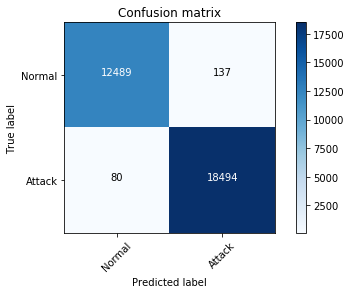

Results for minute_aggregated/irc-1s.featureset.csv
Accuracy: 0.9906, Recall: 0.9877, Precision: 0.9933, f1_score: 0.9905 



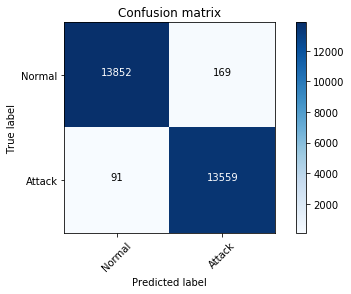

Results for minute_aggregated/ddos-0.01s.featureset.csv
Accuracy: 0.9988, Recall: 0.9991, Precision: 0.9991, f1_score: 0.9991 



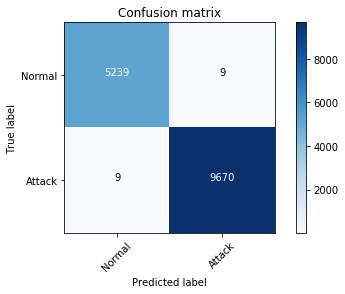

In [22]:
# Machine learning results for each attack type for 10 second intervals for random forest.

for f in files:
    print("Results for {}".format(f))
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, Summarizer().features)
    clf = rf_train(xtrain, ytrain)
    results = test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

For Decision Trees

Results for minute_aggregated/spam-10s.featureset.csv
Accuracy: 0.99, Recall: 0.99, Precision: 0.99, f1_score: 0.99 



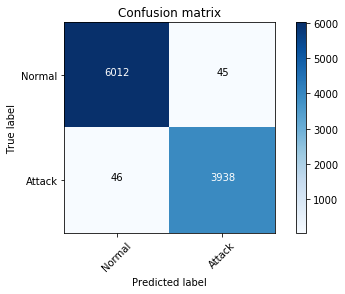

Results for minute_aggregated/irc-10s.featureset.csv
Accuracy: 0.98, Recall: 0.97, Precision: 0.98, f1_score: 0.97 



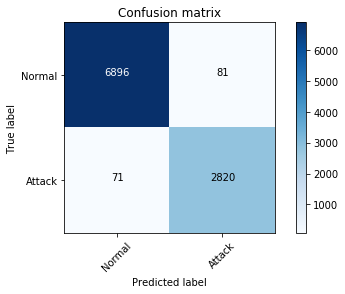

Results for minute_aggregated/ddos-0.01s.featureset.csv
Accuracy: 1.00, Recall: 1.00, Precision: 1.00, f1_score: 1.00 



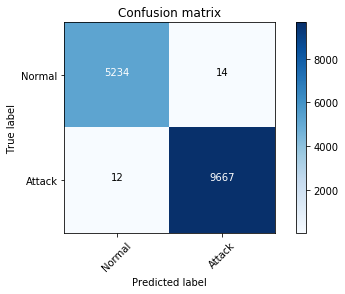

Results for minute_aggregated/p2p-120.0s.featureset.csv
Accuracy: 0.58, Recall: 1.00, Precision: 0.58, f1_score: 0.74 



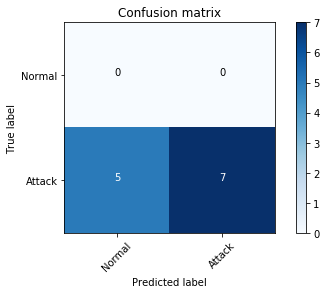

In [9]:
print('For Decision Trees\n')
for f in files:
    print("Results for {}".format(f))
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, features)
    clf = dt_train(xtrain, ytrain)
    results = test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, Precision: {precision:.2f}, f1_score: {f1_score:.2f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

For Deep Learning

Results for minute_aggregated/spam-1s.featureset.csv
Accuracy: 0.9379, Recall: 0.9584, Precision: 0.9362, f1_score: 0.9472 



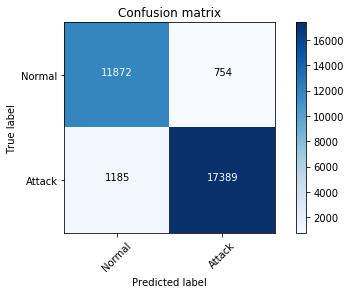

Results for minute_aggregated/irc-1s.featureset.csv
Accuracy: 0.8865, Recall: 0.9408, Precision: 0.8215, f1_score: 0.8771 



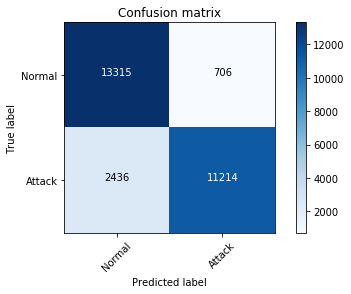

Results for minute_aggregated/ddos-0.01s.featureset.csv
Accuracy: 0.9372, Recall: 0.9389, Precision: 0.9660, f1_score: 0.9523 



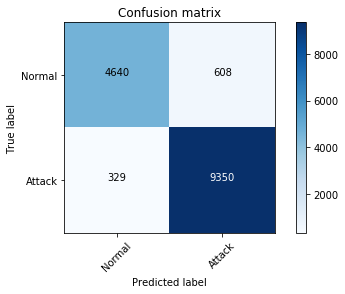

In [17]:
print('For Deep Learning\n')
for f in files:
    print("Results for {}".format(f))
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, features)
    clf = dl_train(xtrain, ytrain)
    results = dl_test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

# ROC curves for each attack and model

minute_aggregated/spam-1s.featureset.csv red
52
minute_aggregated/irc-1s.featureset.csv blue
55
minute_aggregated/ddos-0.01s.featureset.csv green
35


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:2401: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


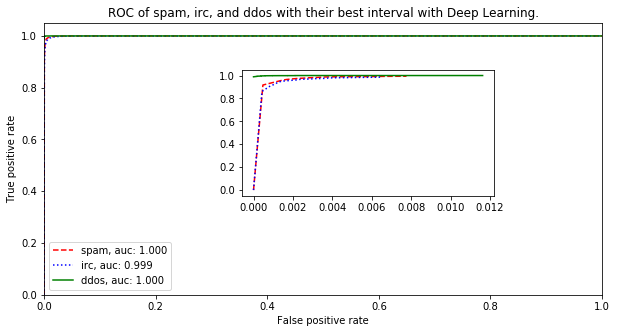

In [14]:
# ROC curves for Random Forest
# %matplotlib notebook
import matplotlib.pyplot as plt
colors = ['red', 'blue', 'green', 'black']
attacks = ['spam', 'irc', 'ddos', '']
linestyles = ['dashed', 'dotted', 'solid']
X_detail = []
Y_detail = []
plt.figure(figsize=(10, 5))

for i, f in enumerate(files):
    print(f, colors[i])
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, features)
    clf = rf_train(xtrain, ytrain)
    fpr, tpr, auc = get_roc_metrics(clf, xtest, ytest, f)
    print(len(fpr))
    amount = 20
    if i == 2:
        amount = 30
    X_detail.append(fpr[:amount])
    Y_detail.append(tpr[:amount])
    plot_roc_curve(fpr, tpr, auc, '{} with random forest'.format(f), '{}, auc: {:.3f}'.format(attacks[i], auc), colors[i], linestyles[i])

plt.title('ROC of spam, irc, and ddos with their best interval with Deep Learning.')
plt.legend()
sub_axes = plt.axes([.4, .4, .35, .35])
i = 0
for x, y in zip(X_detail, Y_detail):
        sub_axes.plot(x, y, color=colors[i], c = 'k', linestyle=linestyles[i])
        i += 1

plt.show()

minute_aggregated/spam-1s.featureset.csv red
13088/14927 [=========================>....] - ETA: 0s

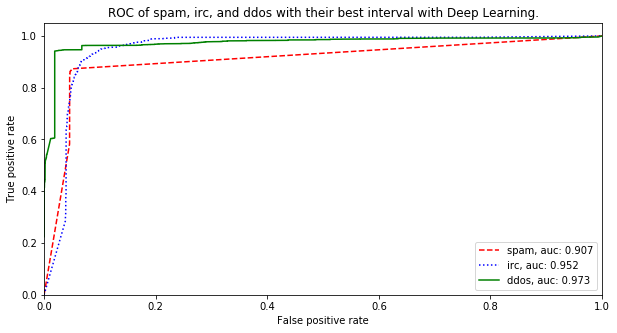

In [15]:
# ROC curves for Random Forest
# %matplotlib notebook
import matplotlib.pyplot as plt
colors = ['red', 'blue', 'green', 'black']
attacks = ['spam', 'irc', 'ddos', '']
linestyles = ['dashed', 'dotted', 'solid']
plt.figure(figsize=(10, 5))
X_detail = []
Y_detail = []
for i, f in enumerate(files):
    print(f, colors[i])
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, features)
    clf = dl_train(xtrain, ytrain)
    fpr, tpr, auc = get_roc_metrics(clf, xtest, ytest, sklearn=False)
    plot_roc_curve(fpr, tpr, auc, '{} with random forest'.format(f), '{}, auc: {:.3f}'.format(attacks[i], auc), colors[i], linestyles[i])

plt.title('ROC of spam, irc, and ddos with their best interval with Deep Learning.')
plt.legend()
plt.show()

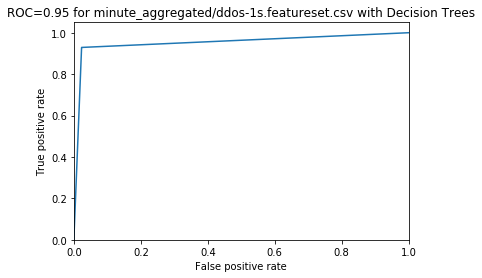

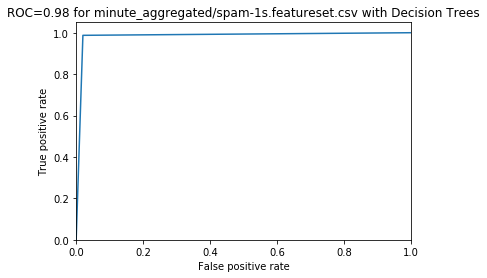

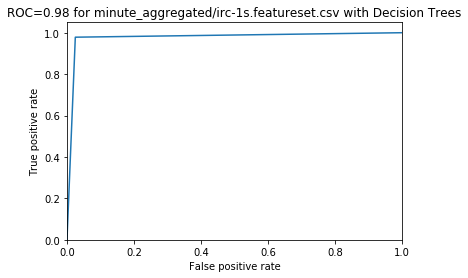

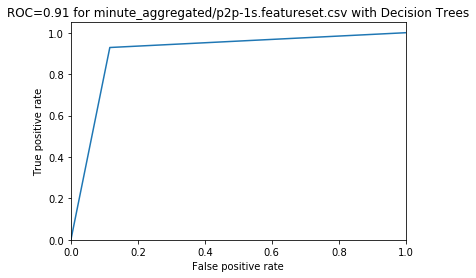

In [23]:
 # For decision trees

for f in files:
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, best_features())
    clf = dt_train(xtrain, ytrain)
    fpr, tpr, auc = get_roc_metrics(clf, xtest, ytest)
    plot_roc_curve(fpr, tpr, auc, '{} with Decision Trees'.format(f))

 32/988 [..............................] - ETA: 3s

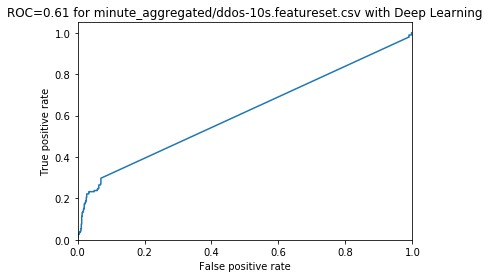

 9568/10041 [===========================>..] - ETA: 0s

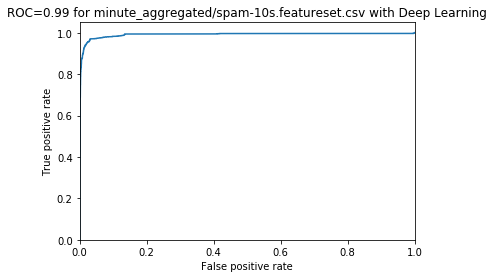

9344/9868 [===========================>..] - ETA: 0s

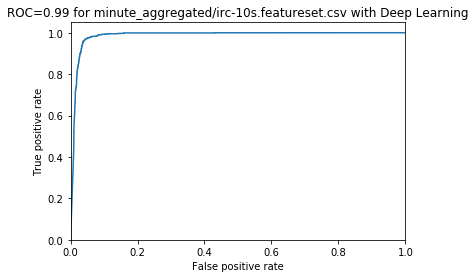

 32/132 [======>.......................] - ETA: 0s

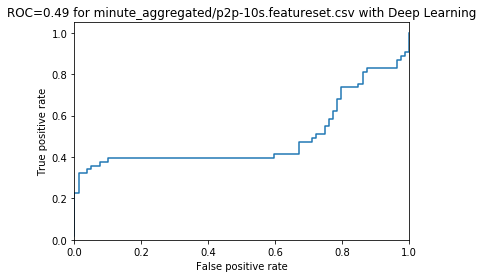

In [4]:
# For Deep Learning

for f in files:
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, best_features())
    clf = dl_train(xtrain, ytrain)
    fpr, tpr, auc = get_roc_metrics(clf, xtest, ytest, sklearn=False)
    plot_roc_curve(fpr, tpr, auc, '{} with Deep Learning'.format(f))

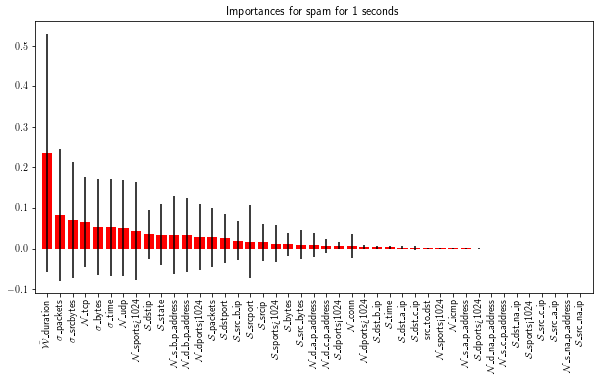

1 avg_duration
2 std_packets
3 std_srcbytes
4 n_tcp


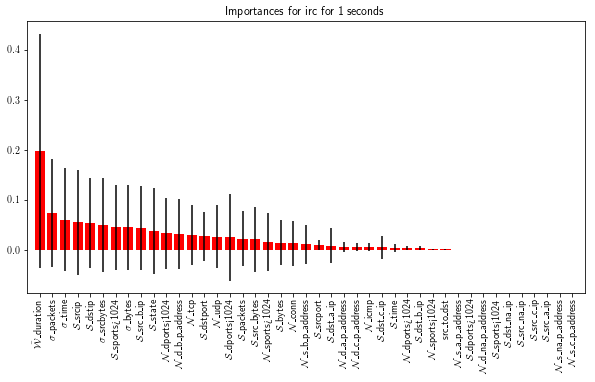

1 avg_duration
2 std_packets
3 std_time
4 entropy_srcip


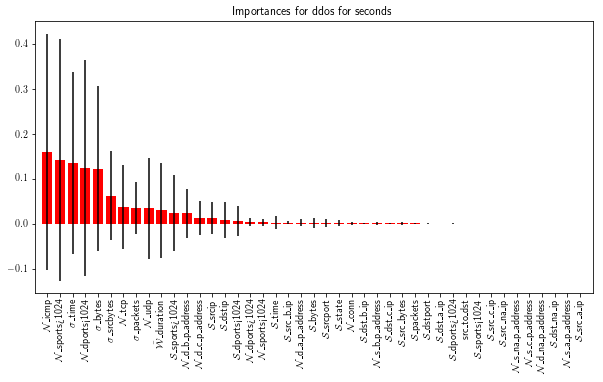

1 n_icmp
2 n_sports>1024
3 std_time
4 n_dports<1024


In [5]:
from plot_features import best_features
from botnet_detection import get_specific_features_from, rf_train
from summarizer import Summarizer
import numpy as np

attacks = ['spam', 'irc', 'ddos']
files = [
    'minute_aggregated/spam-1s.featureset.csv',
    'minute_aggregated/irc-1s.featureset.csv',
    'minute_aggregated/ddos-0.01s.featureset.csv'
]

for f in files:
    features = Summarizer().features
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, features)
    clf = rf_train(xtrain, ytrain)
    attack_interval = f.split('/')[-1].split('.')[0]
    attack = attack_interval.split('-')[0]
    interval = attack_interval.split('-')[1][:-1]
    indices = best_features(clf, np.array(xtrain), '{} for {} seconds'.format(attack, interval), features)
    for i, index in enumerate(indices[:4]):
        print(i+1, features[index])